In [12]:
import json
import funzioni_preprocessing_text as fpt
import gensim

In [11]:
corpus=json.load(open('listaPost_addestramento.json'))

In [13]:
post,bigram_mdl=fpt.clear_corpus(corpus)
dictionary = gensim.corpora.Dictionary(post)
corpus2 = [dictionary.doc2bow(text) for text in post]

tfidf = gensim.models.TfidfModel(corpus2)
corpus_tfidf = tfidf[corpus2]

In [ ]:
coerenza=[]
for k in range(5,25):
    print(f"Round: {k}")
    Lda=gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus_tfidf, num_topics=k, id2word=dictionary, passes=40,\
        iterations=200,chunksize=10000,eval_every=None)
    cm=gensim.models.coherencemodel.CoherenceModel(model=ldamodel,texts=post,\
        dictionary=dictionary,coherence='c_v')
    coerenza.append((k,cm.get_coherence()))

In [52]:
ldaModelDict={}

In [67]:
k=8
passes=500
iterations=1000
tmpldamodel=gensim.models.ldamodel.LdaModel(\
    corpus_tfidf, id2word=dictionary,\
    num_topics=k,passes=passes,iterations=iterations,\
    #chunksize=10000
    #,eval_every=None
    )
cm=gensim.models.coherencemodel.CoherenceModel(model=tmpldamodel,texts=post,\
        dictionary=dictionary,coherence='c_v')
print(k,cm.get_coherence())
ldaModelDict[f"{k}_{passes}_{iterations}"]=tmpldamodel

8 0.5282859012769403


In [47]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [54]:
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(ldaModelDict[5], corpus_tfidf, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

c:\Users\Francesco\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [56]:
lda_display = gensimvis.prepare(ldaModelDict["5_100_200"], corpus_tfidf, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

c:\Users\Francesco\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [60]:
lda_display = gensimvis.prepare(ldaModelDict["5_100_400"], corpus_tfidf, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

c:\Users\Francesco\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [58]:
lda_display = gensimvis.prepare(ldaModelDict["8_100_200"], corpus_tfidf, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

c:\Users\Francesco\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [62]:
lda_display = gensimvis.prepare(ldaModelDict["8_100_400"], corpus_tfidf, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

c:\Users\Francesco\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [66]:
lda_display = gensimvis.prepare(ldaModelDict["8_100_1000"], corpus_tfidf, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

c:\Users\Francesco\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [68]:
lda_display = gensimvis.prepare(ldaModelDict["8_500_1000"], corpus_tfidf, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

c:\Users\Francesco\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [42]:
tmpldamodel.show_topics()

[(0,
  '0.001*"yellowstone" + 0.001*"summer" + 0.001*"town" + 0.001*"join" + 0.001*"ocasio_cortez" + 0.001*"lytton" + 0.001*"sent" + 0.001*"gardiner" + 0.001*"dame_deborah" + 0.001*"labor"'),
 (1,
  '0.002*"shark" + 0.001*"drug" + 0.001*"state" + 0.001*"boebert" + 0.001*"universal" + 0.001*"noah" + 0.001*"iphone" + 0.001*"restriction" + 0.001*"price" + 0.001*"pandemic"'),
 (2,
  '0.001*"mask" + 0.001*"hong_kong" + 0.001*"air" + 0.001*"trip" + 0.001*"billion" + 0.001*"ignatova" + 0.001*"price" + 0.001*"passenger" + 0.001*"summer_s" + 0.001*"swerved"'),
 (3,
  '0.001*"woman" + 0.001*"gym" + 0.001*"reproductive_health" + 0.001*"abortion" + 0.001*"usc_ucla" + 0.001*"pac" + 0.001*"superstar" + 0.001*"fighting" + 0.001*"fellow" + 0.001*"politicized"'),
 (4,
  '0.002*"flight" + 0.001*"individual_age" + 0.001*"passenger" + 0.001*"basketball" + 0.001*"agent" + 0.001*"pod" + 0.001*"sleeping" + 0.001*"longest" + 0.001*"flat" + 0.001*"story"'),
 (5,
  '0.001*"passport" + 0.001*"princess_diana" + 0

In [16]:
from matplotlib import pyplot as plt

In [25]:
m,n=zip(*coerenza)

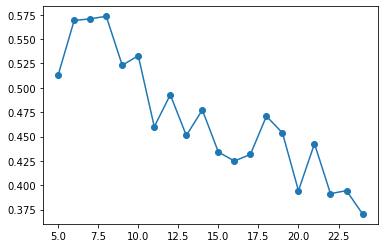

In [31]:
plt.plot(m,n,marker='o')
plt.show()

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=10, id2word=dictionary, passes=500)

In [72]:
v=[(0, 0.39967823),
 (1, 0.06758),
 (2, 0.39855242),
 (3, 0.066705465),
 (4, 0.06748388)]

sorted(v, key=lambda x: x[1], reverse=True)[0][0]

0